In [12]:
import pandas as pd; import numpy as np
import matplotlib.pyplot as plt; import matplotlib.cm as cm
import os

plt.rcParams.update({'font.size': 14}) # Set a good font size


In [13]:
head = ['mergertime', 'simtime', 'm1', 'm2', 'e', 'Mcl',
        'mergetype', 'tlbform', 'rh', 'vk', 'vesc', 'chi_f',
        's1', 's2', 'Z', 'a', 'genmerge', 'mbh']

data = pd.read_csv(os.path.join('runs', 'mergers_10001.txt'), delimiter='\t', names=head)

# Grab the cluster masses and metallicities and find the unique values
Mcls = data['Mcl'].values
metals = data['Z'].values

Mcluni = np.unique(Mcls); metaluni = np.unique(metals)
print(metaluni)

metalUnitest = np.array([0.000126,0.001,0.01])

[0.00012589 0.00015849 0.00019953 0.00025119 0.00031623 0.00039811
 0.00050119 0.00063096 0.00079433 0.001      0.00125893 0.00158489
 0.00199526 0.00251189 0.00316228 0.00398107 0.00501187 0.00630957
 0.00794328 0.01       0.01258926 0.01584893 0.01995262 0.02511887]


In [14]:
data

,mergertime,simtime,m1,m2,e,Mcl,mergetype,tlbform,rh,vk,vesc,chi_f,s1,s2,Z,a,genmerge,mbh
0,2.896072e+11,1.767436e+08,30.591538,26.227865,0.922624,100000.0,ejected,1.331547e+10,303.850309,43.765531,17.068776,0.683230,0.0,0.0,0.000126,2.385090,1,3294.036641
1,5.639927e+08,3.461343e+08,38.775044,31.841730,0.999691,100000.0,incluster_inspiral,1.331547e+10,180.583612,55.593674,15.351718,0.681176,0.0,0.0,0.000126,3.650640,1,2939.420356
2,2.090222e+15,5.639894e+08,33.111149,27.117439,0.385280,100000.0,ejected,1.331547e+10,99.857844,56.323381,13.700753,0.681032,0.0,0.0,0.000126,3.908168,1,2500.122234
3,2.611250e+10,8.100615e+08,34.667442,32.306202,0.972964,100000.0,ejected,1.331547e+10,61.335119,20.251588,12.489234,0.685780,0.0,0.0,0.000126,3.663629,1,2156.426405
4,8.591042e+15,1.372845e+09,22.803167,14.922908,0.495022,100000.0,ejected,1.331547e+10,29.091932,111.427369,10.846220,0.662395,0.0,0.0,0.000126,4.527654,1,1654.364772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7567,1.732646e+13,1.420942e+09,8.045109,7.449346,0.753126,100000.0,ejected,5.196240e+09,100.196387,22.077323,13.186573,0.685651,0.0,0.0,0.025119,0.912159,1,150.661811
7568,2.202230e+12,1.751279e+09,7.394258,7.299244,0.895420,100000.0,ejected,5.196240e+09,86.868842,3.721940,12.795683,0.686437,0.0,0.0,0.025119,1.103982,1,50.463008
7569,4.037823e+13,2.795790e+08,12.160942,8.197144,0.725431,50000.0,ejected,5.196240e+09,238.887495,104.931303,12.673951,0.665573,0.0,0.0,0.025119,1.250056,1,287.442855
7570,1.065173e+13,4.370684e+08,7.612571,7.413867,0.828299,50000.0,ejected,5.196240e+09,179.966356,7.609564,11.929493,0.686364,0.0,0.0,0.025119,1.082273,1,173.053316


Here we split only by cluster mass and so we then find the total number of mergers for a given cluster over the whole range of metallicities and birth time

Text(0, 0.5, '$N_{\\mathrm{incl}}/N_{\\mathrm{tot}}$')

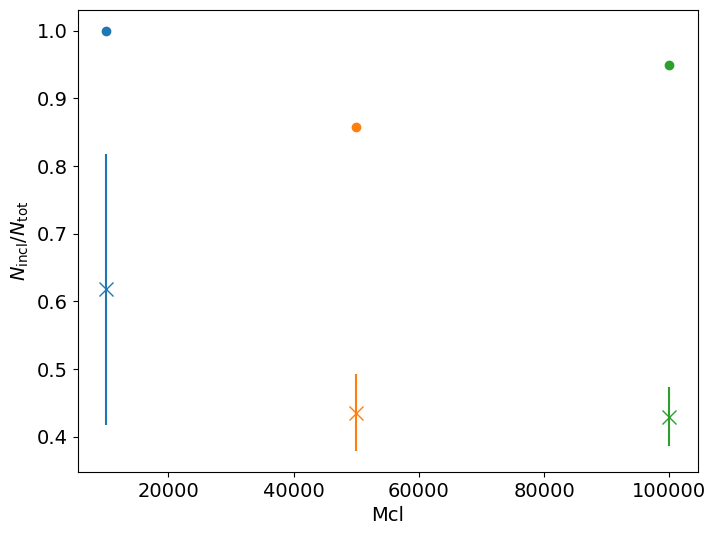

In [11]:
files = os.listdir('runs') # Find the data files

data = [pd.read_csv(os.path.join('runs', file), delimiter='\t', names=head) for file in files] # Load all files

Mcl = {int(mcl): [] for mcl in Mcluni} # dictionary for mass values

# Loop through and find total number of mergers for each
for d in data:
    # Unique redshift times
    tlbuni = np.unique(d['tlbform'].values)
    for mcl in Mcl.keys():
        # Only megrers in this cluster within Ht
        tmp = d.loc[(d['Mcl']==mcl)&(d['mergertime']<=14e9)&(d['simtime']<=1e9)]
        # Find ejected and incluster mergers
        if len(tmp)!=0:
            ejec = np.sum(tmp['mergetype']=='ejected')
            incl = np.sum(tmp['mergetype']!='ejected')

            Mcl[mcl].append([ejec, incl, len(tmp)])

for mcl in Mcl.keys(): Mcl[mcl] = np.asarray(Mcl[mcl])

fig, ax = plt.subplots(figsize=(8,6))

for i, (key, item) in enumerate(Mcl.items()):

    # Plot mean and errors
    ax.errorbar(key, np.mean(item[:,1]/item[:,-1]), np.std(item[:,1]/item[:,-1]), marker='x', markersize=10, label=key, color='C'+str(i))
    # ax.scatter(key, np.mean(item[:,-1]), marker='x', color='black')

####### PETAR DATA ##########
petar = [np.array([[0,2,2],[0,1,1],[0,1,1]]), np.array([[1,2,3],[0,1,1],[0,3,3]]), np.array([[1,6,7],[0,7,7],[0,6,6]])]

for i, p in enumerate(petar):
    ax.scatter(Mcluni[i], sum(p[:,1])/sum(p[:,-1]), color='C'+str(i))
    # ax.scatter(Mcluni[::-1][i], sum(p[:,-1]), color='black')
ax.set_xlabel('Mcl')
ax.set_ylabel('$N_{\mathrm{incl}}/N_{\mathrm{tot}}$')

# ax.set_yscale('log')

# ax.legend()


In [9]:
print(Mcl)

{10000: array([[ 3,  5,  8],
       [ 3,  6,  9],
       [19,  9, 28],
       [ 3,  4,  7],
       [ 4,  5,  9],
       [ 3,  4,  7],
       [ 3,  2,  5],
       [ 4,  7, 11],
       [ 4,  5,  9],
       [ 4,  3,  7],
       [ 3,  3,  6],
       [ 0,  2,  2],
       [ 2,  4,  6],
       [ 3,  8, 11],
       [ 1,  3,  4],
       [ 4,  5,  9],
       [ 3,  4,  7],
       [ 1,  4,  5],
       [ 3,  2,  5],
       [ 4,  5,  9],
       [ 4,  8, 12],
       [ 1,  6,  7],
       [ 3,  2,  5],
       [ 2,  2,  4],
       [ 4,  8, 12],
       [ 6,  3,  9],
       [ 2,  7,  9],
       [ 3,  3,  6],
       [ 8,  3, 11],
       [ 3, 20, 23],
       [ 1,  3,  4],
       [ 0,  2,  2],
       [ 1,  8,  9],
       [ 2,  4,  6],
       [ 2,  5,  7],
       [ 2,  9, 11],
       [ 3,  5,  8],
       [ 5,  1,  6],
       [ 2,  5,  7],
       [ 4,  3,  7],
       [ 5,  9, 14],
       [ 1,  2,  3],
       [ 1,  5,  6],
       [ 1,  5,  6],
       [ 2,  6,  8],
       [ 2, 10, 12],
       [ 2,  2,  4],
     

Below we split it up into every individual cluster (sectioning by metallicity, birth time and cluster mass)

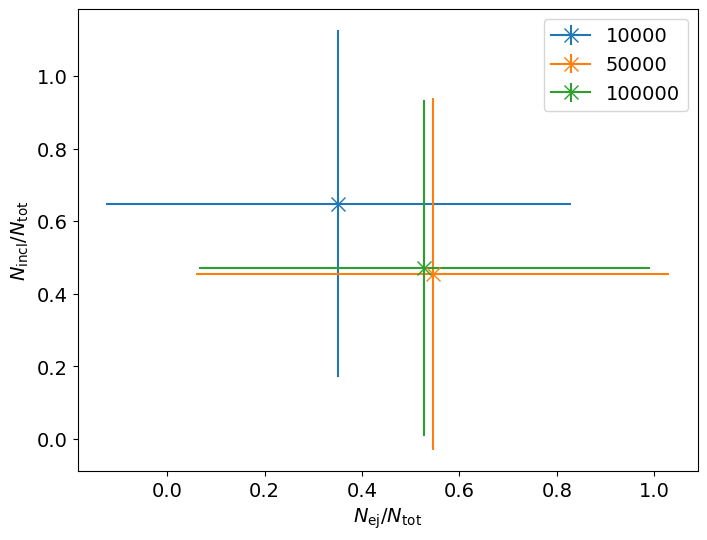

In [4]:
files = os.listdir('runs') # Find the data files

data = [pd.read_csv(os.path.join('runs', file), delimiter='\t', names=head) for file in files] # Load all files

Mcl = {int(mcl): [] for mcl in Mcluni} # dictionary for mass values

# Loop through and find total number of mergers for each
for d in data:
    # Unique redshift times
    tlbuni = np.unique(d['tlbform'].values)
    for mcl in Mcl.keys():
        for metal in metaluni:
            for tlb in tlbuni:
                # Only megrers in this cluster within Ht
                tmp = d.loc[(d['Mcl']==mcl)&(d['Z']==metal)&(d['tlbform']==tlb)&(d['mergertime']<=14e9)]

                # Find ejected and incluster mergers
                if len(tmp)!=0:
                    ejec = sum(tmp['mergetype']=='ejected')/len(tmp)
                    incl = sum(tmp['mergetype']!='ejected')/len(tmp)

                    Mcl[mcl].append([ejec, incl, len(tmp)])

for mcl in Mcl.keys(): Mcl[mcl] = np.asarray(Mcl[mcl])

fig, ax = plt.subplots(figsize=(8,6))

for key, item in Mcl.items():
    # Plot mean and errors
    ax.errorbar(np.mean(item[:,0]), np.mean(item[:,1]), 
                np.std(item[:,0]), np.std(item[:,1]), marker='x', markersize=10, label=key)

ax.set_xlabel('$N_{\mathrm{ej}}/N_{\mathrm{tot}}$')
ax.set_ylabel('$N_{\mathrm{incl}}/N_{\mathrm{tot}}$')

ax.legend()


Above plot is across every metallicity bin

C:\Users\c1718684\AppData\Local\Temp\ipykernel_29304\2788362416.py:17: MatplotlibDeprecationWarning: Unable to determine Axes to steal space for Colorbar. Using gca(), but will raise in the future. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.
  fig.colorbar(cm.ScalarMappable(norm=norm, cmap='viridis'))


3840.6097839319036


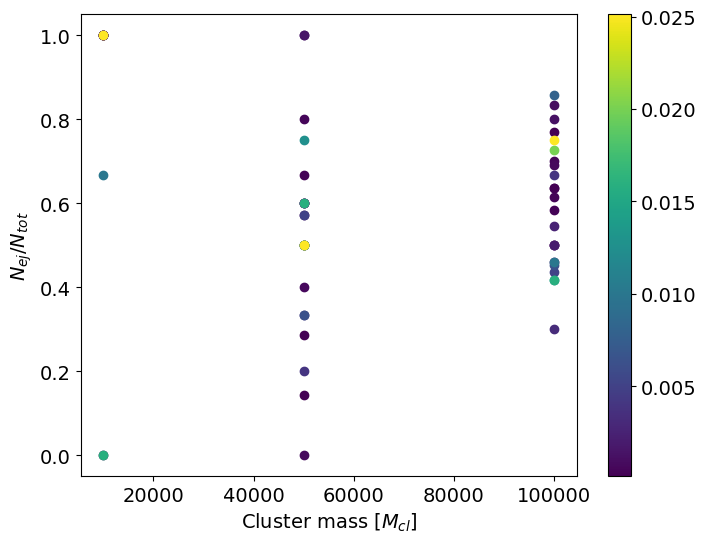

In [55]:
fig, ax = plt.subplots(figsize=(8,6))

norm = plt.Normalize(min(metaluni), max(metaluni))

for mcl in Mcluni:
    # print(mcl)
    for metal in metaluni:
        tmp = data.loc[(data['Mcl']==mcl)&(data['Z']==metal)&(data['mergertime']<=14e9)]    

        # print(len(tmp))
        color=cm.viridis(norm(metal))
        try:
            ax.scatter(mcl, sum(tmp['mergetype']=='ejected')/len(tmp), color=color)
        except:
            continue

fig.colorbar(cm.ScalarMappable(norm=norm, cmap='viridis'))

ax.set_xlabel('Cluster mass [$M_{cl}$]')
ax.set_ylabel('$N_{ej}/N_{tot}$')


print(max(data['simtime'])/1e6)

AttributeError: 'list' object has no attribute 'loc'

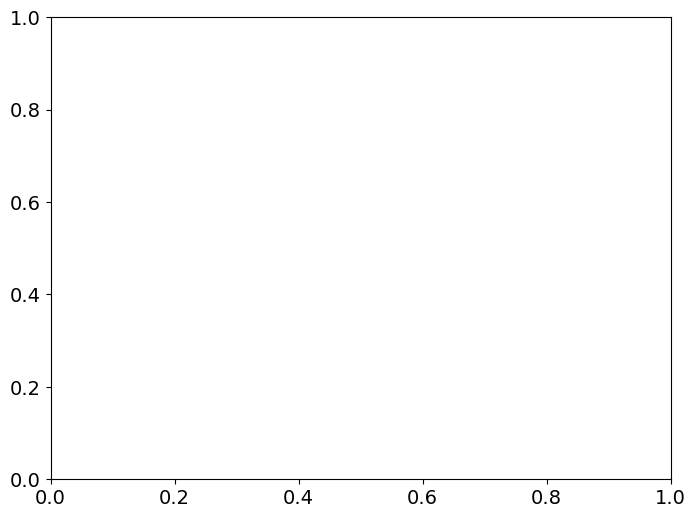

In [5]:
fig, ax = plt.subplots(figsize=(8,6))

norm = plt.Normalize(min(metaluni), max(metaluni))

for mcl in Mcluni[2:]:
    for metal in metaluni[::2]:
        tmp = data.loc[(data['Mcl']==mcl)&(data['Z']==metal)]    

        tmp.sort_values('simtime')

        color=cm.viridis(norm(metal))
        ax.plot(tmp['simtime']/1e6, tmp['rh'], color=color)

fig.colorbar(cm.ScalarMappable(norm=norm, cmap='viridis'))

ax.set_xlabel('Simulation time [Myrs]')
ax.set_ylabel('$r_{\mathrm{h}}$')


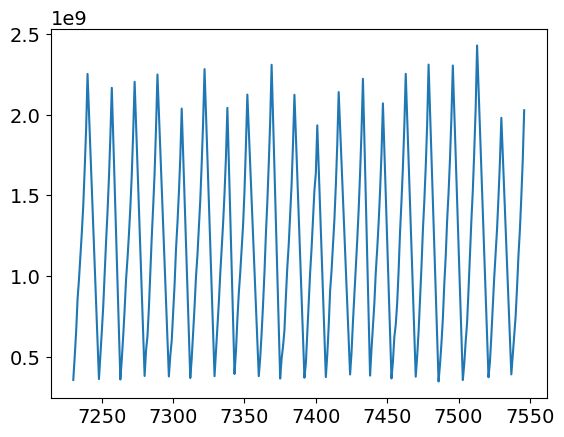

In [47]:
plt.plot((tmp['simtime']))